# Supervised machine learning algorithms application on dataset with binomial outcome

In [45]:
import warnings
warnings.filterwarnings("ignore")
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt 
import seaborn as sns
%matplotlib inline
from sklearn.linear_model import LogisticRegression 
from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold 
from sklearn.ensemble import RandomForestClassifier 
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn import svm 
from sklearn import metrics 
from sklearn import linear_model

Loading data called data.csv and call it data, while data_m_b was created only for plotting purpose

In [3]:
data = pd.read_csv("data.csv",header=0)
data_m_b=pd.read_csv("data.csv",header=0)

Getting first info about data

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 31 columns):
diagnosis                  569 non-null object
radius_mean                569 non-null float64
texture_mean               569 non-null float64
perimeter_mean             569 non-null float64
area_mean                  569 non-null float64
smoothness_mean            569 non-null float64
compactness_mean           569 non-null float64
concavity_mean             569 non-null float64
concave points_mean        569 non-null float64
symmetry_mean              569 non-null float64
fractal_dimension_mean     569 non-null float64
radius_se                  569 non-null float64
texture_se                 569 non-null float64
perimeter_se               569 non-null float64
area_se                    569 non-null float64
smoothness_se              569 non-null float64
compactness_se             569 non-null float64
concavity_se               569 non-null float64
concave points_se          569 n

Name of parameters of the dataset

In [6]:
data.columns

Index(['diagnosis', 'radius_mean', 'texture_mean', 'perimeter_mean',
       'area_mean', 'smoothness_mean', 'compactness_mean', 'concavity_mean',
       'concave points_mean', 'symmetry_mean', 'fractal_dimension_mean',
       'radius_se', 'texture_se', 'perimeter_se', 'area_se', 'smoothness_se',
       'compactness_se', 'concavity_se', 'concave points_se', 'symmetry_se',
       'fractal_dimension_se', 'radius_worst', 'texture_worst',
       'perimeter_worst', 'area_worst', 'smoothness_worst',
       'compactness_worst', 'concavity_worst', 'concave points_worst',
       'symmetry_worst', 'fractal_dimension_worst'],
      dtype='object')

Snapshot of the data

In [7]:
data.head()

,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


Countplot of Malignant vs Benign observations

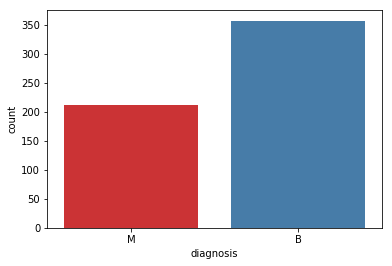

In [8]:
sns.countplot(x=data['diagnosis'],label="Count",palette="Set1")

Defining all predictors as variabl all_predictors that will be used later

In [9]:
all_predictors=['radius_mean', 'texture_mean', 'perimeter_mean',
       'area_mean', 'smoothness_mean', 'compactness_mean', 'concavity_mean',
       'concave points_mean', 'symmetry_mean', 'fractal_dimension_mean',
       'radius_se', 'texture_se', 'perimeter_se', 'area_se', 'smoothness_se',
       'compactness_se', 'concavity_se', 'concave points_se', 'symmetry_se',
       'fractal_dimension_se', 'radius_worst', 'texture_worst',
       'perimeter_worst', 'area_worst', 'smoothness_worst',
       'compactness_worst', 'concavity_worst', 'concave points_worst',
       'symmetry_worst', 'fractal_dimension_worst']

Chaning M and B at diagnosis column on 1 and 0

In [10]:
data['diagnosis']=data['diagnosis'].map({'M':1,'B':0})

Creating variable for dependant variable

In [11]:
outcome_var= "diagnosis"

Histogram plots for each predictor seperated by Diagnosis

C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6521: MatplotlibDeprecationWarning: 
The 'normed' kwarg was deprecated in Matplotlib 2.1 and will be removed in 3.1. Use 'density' instead.
  alternative="'density'", removal="3.1")
C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6521: MatplotlibDeprecationWarning: 
The 'normed' kwarg was deprecated in Matplotlib 2.1 and will be removed in 3.1. Use 'density' instead.
  alternative="'density'", removal="3.1")
C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6521: MatplotlibDeprecationWarning: 
The 'normed' kwarg was deprecated in Matplotlib 2.1 and will be removed in 3.1. Use 'density' instead.
  alternative="'density'", removal="3.1")
C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6521: MatplotlibDeprecationWarning: 
The 'normed' kwarg was deprecated in Matplotlib 2.1 and will be removed in 3.1. Use 'density' instead.
  alternative="'density'", removal="3.1")


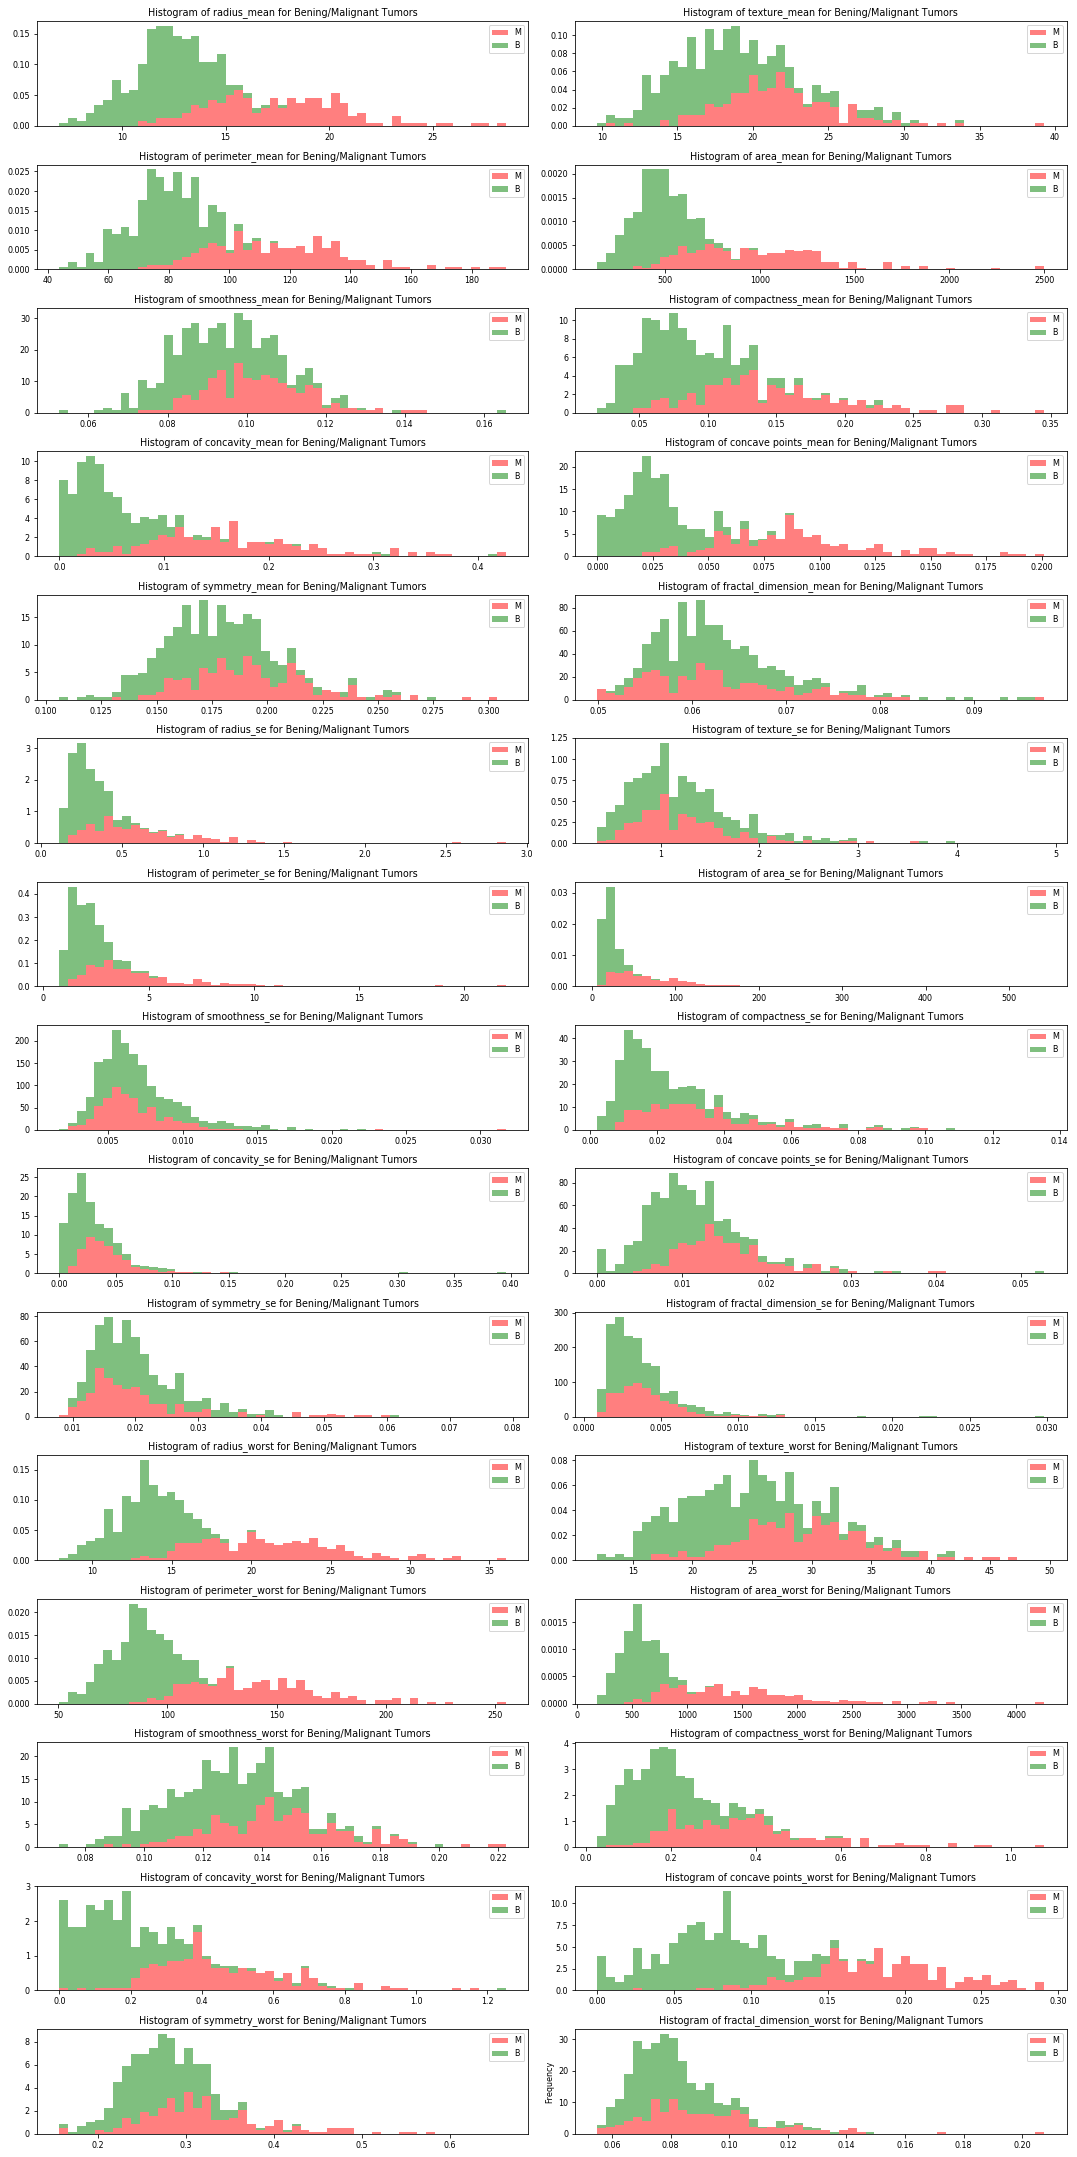

In [17]:
import matplotlib.pyplot as plt 
import matplotlib.gridspec as gridspec 

features_mean=list(data.columns[1:31])
dfM=data[data['diagnosis'] ==1]
dfB=data[data['diagnosis'] ==0]
plt.rcParams.update({'font.size': 8})
fig, axes = plt.subplots(nrows=15, ncols=2, figsize=(15,30))
axes = axes.ravel()
for idx,ax in enumerate(axes):
    ax.figure
    binwidth= (max(data[features_mean[idx]]) - min(data[features_mean[idx]]))/50
    ax.hist([dfM[features_mean[idx]],dfB[features_mean[idx]]], bins=np.arange(min(data[features_mean[idx]]), max(data[features_mean[idx]]) + binwidth, binwidth) , alpha=0.5,stacked=True, normed = True, label=['M','B'],color=['r','g'])
    ax.legend(loc='upper right')
    ax.set_title(f"Histogram of {features_mean[idx]} for Bening/Malignant Tumors")
    plt.ylabel("Frequency")  
plt.ylabel("Frequency")    
plt.tight_layout()
plt.show()


Correalation Heatmap for all predictors

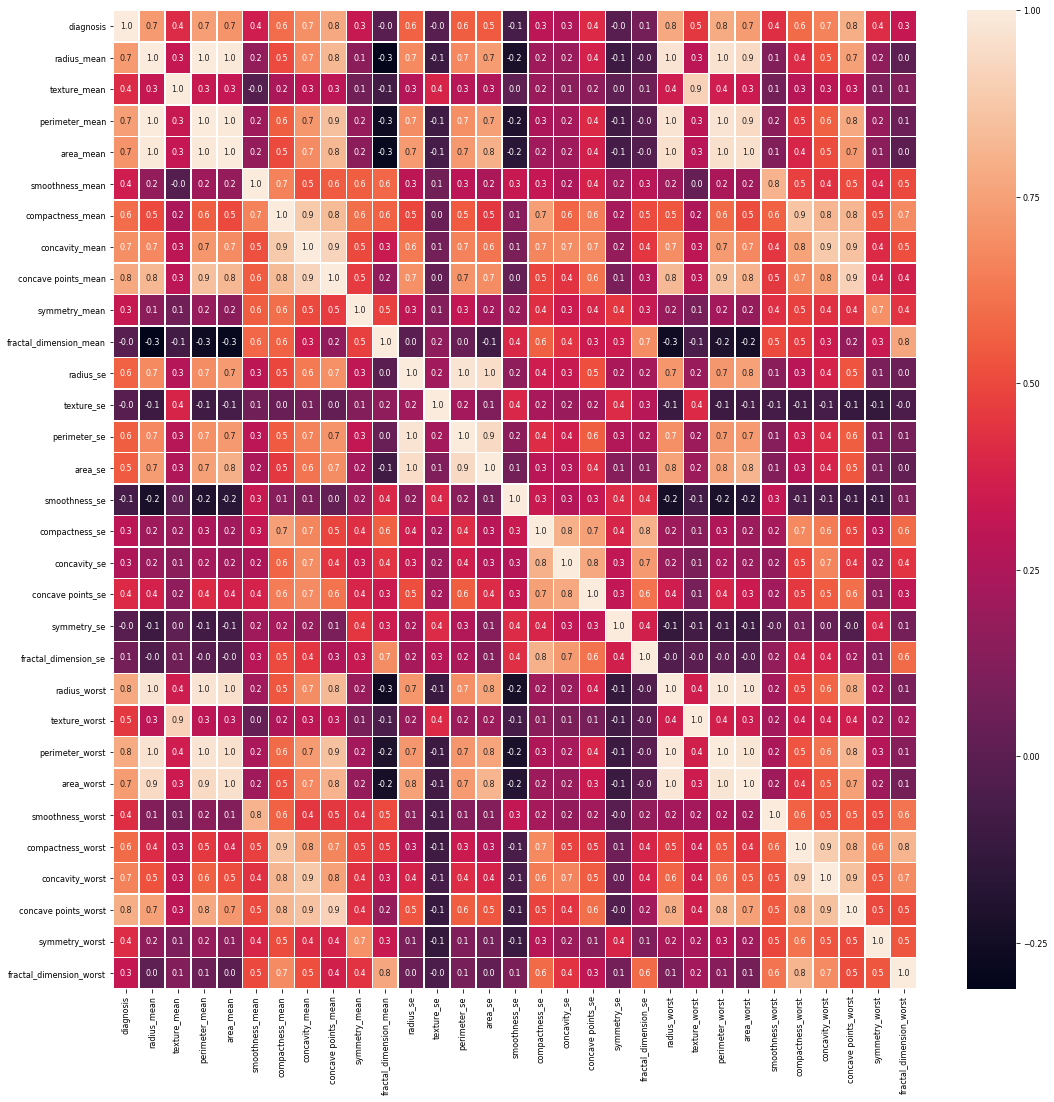

In [18]:
#correlation map
f,ax = plt.subplots(figsize=(18, 18))
sns.heatmap(data.corr(), annot=True, linewidths=.5, fmt= '.1f',ax=ax)

Defining a function that will do the same process for each algorithm. First calculated accuracy for training data, then divides data into 4 folds and gives 4-fold CV scores.

In [23]:
def classification_model(model,data,prediction_input,output):
    
    model.fit(data[prediction_input],data[output]) 
  
    predictions = model.predict(data[prediction_input])

    accuracy = metrics.accuracy_score(predictions,data[output])
    print("Accuracy : %s" % "{0:.3%}".format(accuracy))
 
    
    kf = KFold(n_splits=4,random_state=41,shuffle=True)
    print (kf)
    error = []
    for train, test in kf.split(data):
        train_X = (data[prediction_input].iloc[train,:])
        train_y = data[output].iloc[train]
        model.fit(train_X, train_y)
    
        
        test_X=data[prediction_input].iloc[test,:]
        test_y=data[output].iloc[test]
        error.append(model.score(test_X,test_y))
                 
        print("Cross-Validation Score : %s" % "{0:.3%}".format(error[-1]))
     
    print(f"Average accuracy score is : %s" % "{0:.3%}".format(np.mean(error)))                                                           

6 Most significant predictors chosen by Logitic regression with stepwise selction using SAS are defined as prediction_var

In [21]:
outcome_var= "diagnosis"
prediction_var = ['radius_se','area_worst','concavity_worst','compactness_se','texture_worst','concave points_worst']

Results of Decision Tree Classifier using all predictors

In [26]:
model = DecisionTreeClassifier()
classification_model(model,data,all_predictors,outcome_var)

Accuracy : 100.000%
KFold(n_splits=4, random_state=41, shuffle=True)
Cross-Validation Score : 97.203%
Cross-Validation Score : 88.732%
Cross-Validation Score : 88.732%
Cross-Validation Score : 95.070%
Average accuracy score is : 92.435%


Results of Decision Tree Classifier using 6 predictors

In [27]:
model = DecisionTreeClassifier()
classification_model(model,data,prediction_var,outcome_var)

Accuracy : 100.000%
KFold(n_splits=4, random_state=41, shuffle=True)
Cross-Validation Score : 97.902%
Cross-Validation Score : 90.845%
Cross-Validation Score : 90.141%
Cross-Validation Score : 93.662%
Average accuracy score is : 93.137%


Results of Random Forest Classifier using 6 predictors

In [30]:
model = RandomForestClassifier(n_estimators=100, max_features=2)
classification_model(model, data,prediction_var,outcome_var)

Accuracy : 100.000%
KFold(n_splits=4, random_state=41, shuffle=True)
Cross-Validation Score : 99.301%
Cross-Validation Score : 95.775%
Cross-Validation Score : 92.254%
Cross-Validation Score : 96.479%
Average accuracy score is : 95.952%


Results of Random Forest Classifier using all predictors

In [31]:
model = RandomForestClassifier(n_estimators=100,max_depth=30, max_features=2)
classification_model(model, data,all_predictors,outcome_var)

Accuracy : 100.000%
KFold(n_splits=4, random_state=41, shuffle=True)
Cross-Validation Score : 98.601%
Cross-Validation Score : 93.662%
Cross-Validation Score : 89.437%
Cross-Validation Score : 98.592%
Average accuracy score is : 95.073%


Results of SVM with gaussian rbf kernel using 6 predictors

In [459]:
model = svm.SVC(kernel='rbf')
classification_model(model,data,prediction_var,outcome_var)

Accuracy : 99.473%
KFold(n_splits=4, random_state=41, shuffle=True)
Cross-Validation Score : 67.133%
Cross-Validation Score : 61.972%
Cross-Validation Score : 67.606%
Cross-Validation Score : 65.493%
[0.6713286713286714, 0.6197183098591549, 0.676056338028169, 0.6549295774647887]
Average accuracy score is : 65.551%


Results of SVM with gaussian rbf kernel using all predictors

In [32]:
model = svm.SVC(kernel='rbf')
classification_model(model,data,all_predictors,outcome_var)

Accuracy : 100.000%
KFold(n_splits=4, random_state=41, shuffle=True)
Cross-Validation Score : 62.937%
Cross-Validation Score : 59.155%
Cross-Validation Score : 64.085%
Cross-Validation Score : 64.789%
Average accuracy score is : 62.741%


Results of SVM with linear kernel using 6 predictors

In [33]:
model = svm.SVC(kernel='linear')
classification_model(model,data,prediction_var,outcome_var)

Accuracy : 95.782%
KFold(n_splits=4, random_state=41, shuffle=True)
Cross-Validation Score : 98.601%
Cross-Validation Score : 95.070%
Cross-Validation Score : 91.549%
Cross-Validation Score : 96.479%
Average accuracy score is : 95.425%


Results of SVM with linear kernel using all predictors

In [34]:
model = svm.SVC(kernel='linear')
classification_model(model,data,all_predictors,outcome_var)

Accuracy : 96.661%
KFold(n_splits=4, random_state=41, shuffle=True)
Cross-Validation Score : 98.601%
Cross-Validation Score : 93.662%
Cross-Validation Score : 90.141%
Cross-Validation Score : 96.479%
Average accuracy score is : 94.721%


Results of SVM with sigmoid kernel using 6 predictors

In [463]:
model = svm.SVC(kernel='sigmoid')
classification_model(model,data,prediction_var,outcome_var)

Accuracy : 62.742%
KFold(n_splits=4, random_state=41, shuffle=True)
Cross-Validation Score : 62.937%
Cross-Validation Score : 59.155%
Cross-Validation Score : 64.085%
Cross-Validation Score : 64.789%
[0.6293706293706294, 0.5915492957746479, 0.6408450704225352, 0.647887323943662]
Average accuracy score is : 62.741%


Results of SVM with sigmoid kernel using all predictors

In [36]:
model = svm.SVC(kernel='sigmoid')
classification_model(model,data,all_predictors,outcome_var)

Accuracy : 62.742%
KFold(n_splits=4, random_state=41, shuffle=True)
Cross-Validation Score : 62.937%
Cross-Validation Score : 59.155%
Cross-Validation Score : 64.085%
Cross-Validation Score : 64.789%
Average accuracy score is : 62.741%


Results of Kneigbors classifier using Euclidean distances using 6 predictors

In [37]:
model = KNeighborsClassifier()
classification_model(model,data,prediction_var,outcome_var)

Accuracy : 93.497%
KFold(n_splits=4, random_state=41, shuffle=True)
Cross-Validation Score : 93.007%
Cross-Validation Score : 88.028%
Cross-Validation Score : 90.141%
Cross-Validation Score : 97.183%
Average accuracy score is : 92.090%


Results of Kneigbors classifier using Euclidean distances using all predictors

In [467]:
model = KNeighborsClassifier()
classification_model(model,data,all_predictors,outcome_var)

Accuracy : 94.728%
KFold(n_splits=4, random_state=41, shuffle=True)
Cross-Validation Score : 93.007%
Cross-Validation Score : 92.254%
Cross-Validation Score : 91.549%
Cross-Validation Score : 95.070%
[0.9300699300699301, 0.9225352112676056, 0.9154929577464789, 0.9507042253521126]
Average accuracy score is : 92.970%


Results of Kneigbors classifier using Manhattan distances using 6 predictors

In [466]:
model = KNeighborsClassifier(p=1)
classification_model(model,data,prediction_var,outcome_var)

Accuracy : 94.376%
KFold(n_splits=4, random_state=41, shuffle=True)
Cross-Validation Score : 94.406%
Cross-Validation Score : 88.732%
Cross-Validation Score : 90.141%
Cross-Validation Score : 95.775%
[0.9440559440559441, 0.8873239436619719, 0.9014084507042254, 0.9577464788732394]
Average accuracy score is : 92.263%


Results of Kneighbors classifier using Manhattan distances using all predictors

In [468]:
model = KNeighborsClassifier(p=1)
classification_model(model,data,all_predictors,outcome_var)

Accuracy : 95.431%
KFold(n_splits=4, random_state=41, shuffle=True)
Cross-Validation Score : 94.406%
Cross-Validation Score : 91.549%
Cross-Validation Score : 92.254%
Cross-Validation Score : 95.775%
[0.9440559440559441, 0.9154929577464789, 0.9225352112676056, 0.9577464788732394]
Average accuracy score is : 93.496%


Results of Kneighbors classifier using Minkowski p=3 distances using all predictors

In [469]:
model = KNeighborsClassifier(p=3)
classification_model(model,data,all_predictors,outcome_var)

Accuracy : 94.552%
KFold(n_splits=4, random_state=41, shuffle=True)
Cross-Validation Score : 93.706%
Cross-Validation Score : 92.254%
Cross-Validation Score : 91.549%
Cross-Validation Score : 95.070%
[0.9370629370629371, 0.9225352112676056, 0.9154929577464789, 0.9507042253521126]
Average accuracy score is : 93.145%


Results of Kneighbors classifier using Minkowski p=3 distances using 6 predictors

In [40]:
model = KNeighborsClassifier(p=3)
classification_model(model,data,prediction_var,outcome_var)

Accuracy : 93.322%
KFold(n_splits=4, random_state=41, shuffle=True)
Cross-Validation Score : 93.007%
Cross-Validation Score : 88.028%
Cross-Validation Score : 90.845%
Cross-Validation Score : 97.183%
Average accuracy score is : 92.266%


Unfortunately my computer coulndt run polynomial kernel of SVM

In [41]:
#model = svm.SVC(kernel='poly')
#classification_model(model,X,prediction_var2,outcome_var2)

Results of Logistic Regression with ridge penalty using 6 predictors

In [42]:
model=LogisticRegression()
classification_model(model,data,prediction_var,outcome_var)
model.coef_

Accuracy : 94.903%
KFold(n_splits=4, random_state=41, shuffle=True)
Cross-Validation Score : 96.503%
Cross-Validation Score : 88.732%
Cross-Validation Score : 90.141%
Cross-Validation Score : 95.775%
Average accuracy score is : 92.788%


array([[0.64156833, 0.00555452, 2.72633102, 0.02941559, 0.02380858,
        0.84950026]])

Results of Logistic Regression with ridge penalty using 6 predictors

In [483]:
model=LogisticRegression(penalty='l2')
classification_model(model,data,all_predictors,outcome_var)


Accuracy : 95.958%
KFold(n_splits=4, random_state=41, shuffle=True)
Cross-Validation Score : 97.902%
Cross-Validation Score : 92.254%
Cross-Validation Score : 92.958%
Cross-Validation Score : 95.775%
[0.9790209790209791, 0.9225352112676056, 0.9295774647887324, 0.9577464788732394]
Average accuracy score is : 94.722%


Results of Logistic Regression with lasso penalty using 6 predictors and coefficients of predictors

In [43]:
model=LogisticRegression(penalty='l1')
classification_model(model,data,prediction_var,outcome_var)
model.coef_

Accuracy : 95.431%
KFold(n_splits=4, random_state=41, shuffle=True)
Cross-Validation Score : 98.601%
Cross-Validation Score : 95.070%
Cross-Validation Score : 90.845%
Cross-Validation Score : 97.183%
Average accuracy score is : 95.425%


array([[2.10321532, 0.00892396, 5.16799515, 0.        , 0.15701974,
        0.        ]])

Results of Logistic Regression with lasso penalty using all predictors and coefficients of predictors

In [46]:
model=LogisticRegression(penalty='l1')
classification_model(model,data,all_predictors,outcome_var)
model.coef_

Accuracy : 95.958%
KFold(n_splits=4, random_state=41, shuffle=True)
Cross-Validation Score : 98.601%
Cross-Validation Score : 92.958%
Cross-Validation Score : 92.254%
Cross-Validation Score : 95.775%
Average accuracy score is : 94.897%


array([[-4.0958732 , -0.06593394,  0.09680937,  0.01957743,  0.        ,
         0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
         0.        , -0.93429995, -0.1148191 ,  0.11208174,  0.        ,
         0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
        -0.19824339,  0.30622498,  0.18648275,  0.01283658,  0.        ,
         0.        ,  2.7244296 ,  0.        ,  0.        ,  0.        ]])

## Decision Tree and Random forest plots 

In [47]:
y=data_m_b['diagnosis']
x=data_m_b.iloc[:,1:]

In [48]:
import pydotplus
from sklearn import tree
import graphviz 
from IPython.display import Image  
x_train, x_test, y_train, y_test = train_test_split(data_m_b[all_predictors], data_m_b[outcome_var], test_size=0.25, random_state=41)


Accuracy : 99.473%
[0.9790209790209791]


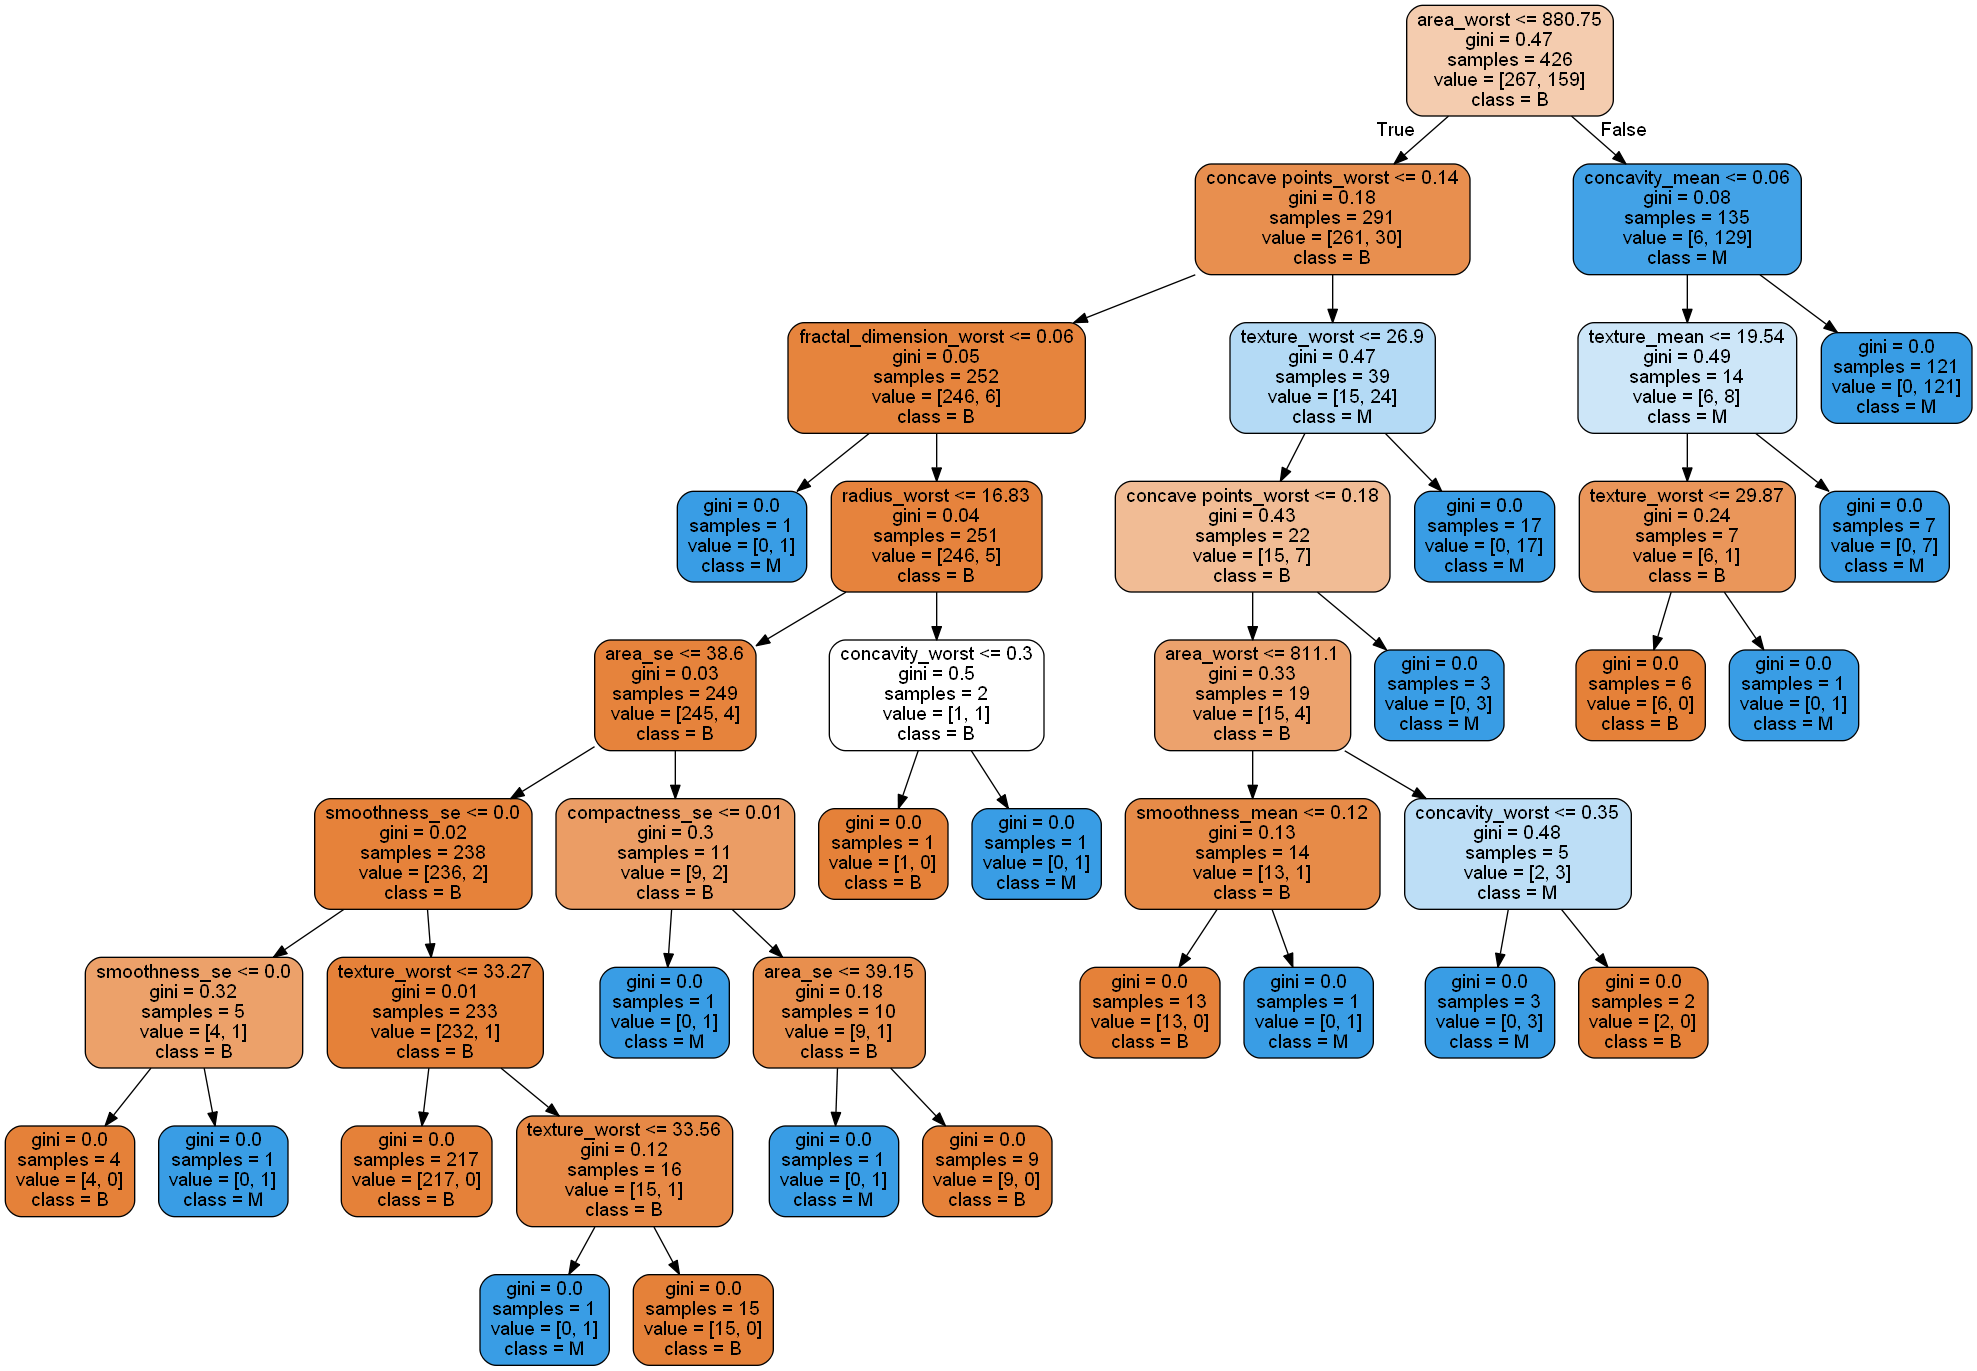

In [49]:
model = DecisionTreeClassifier()
model.fit(x_train,y_train)
predictions = model.predict(data_m_b[all_predictors])
accuracy = metrics.accuracy_score(predictions,data_m_b[outcome_var])
print("Accuracy : %s" % "{0:.3%}".format(accuracy))
error=[]
error.append(model.score(x_test,y_test))
print(error)
dot_data = tree.export_graphviz(model, out_file=None, 
                feature_names = x.columns,class_names = model.classes_, rounded = True, proportion = False, 
                precision = 2, filled = True)  
graph = graphviz.Source(dot_data)  
graph = pydotplus.graph_from_dot_data(dot_data)  

# Show graph
Image(graph.create_png())
# Create PDF


In [50]:
graph.write_pdf("decision_tree.pdf")

# Create PNG
graph.write_png("decision_tree.png")
graph

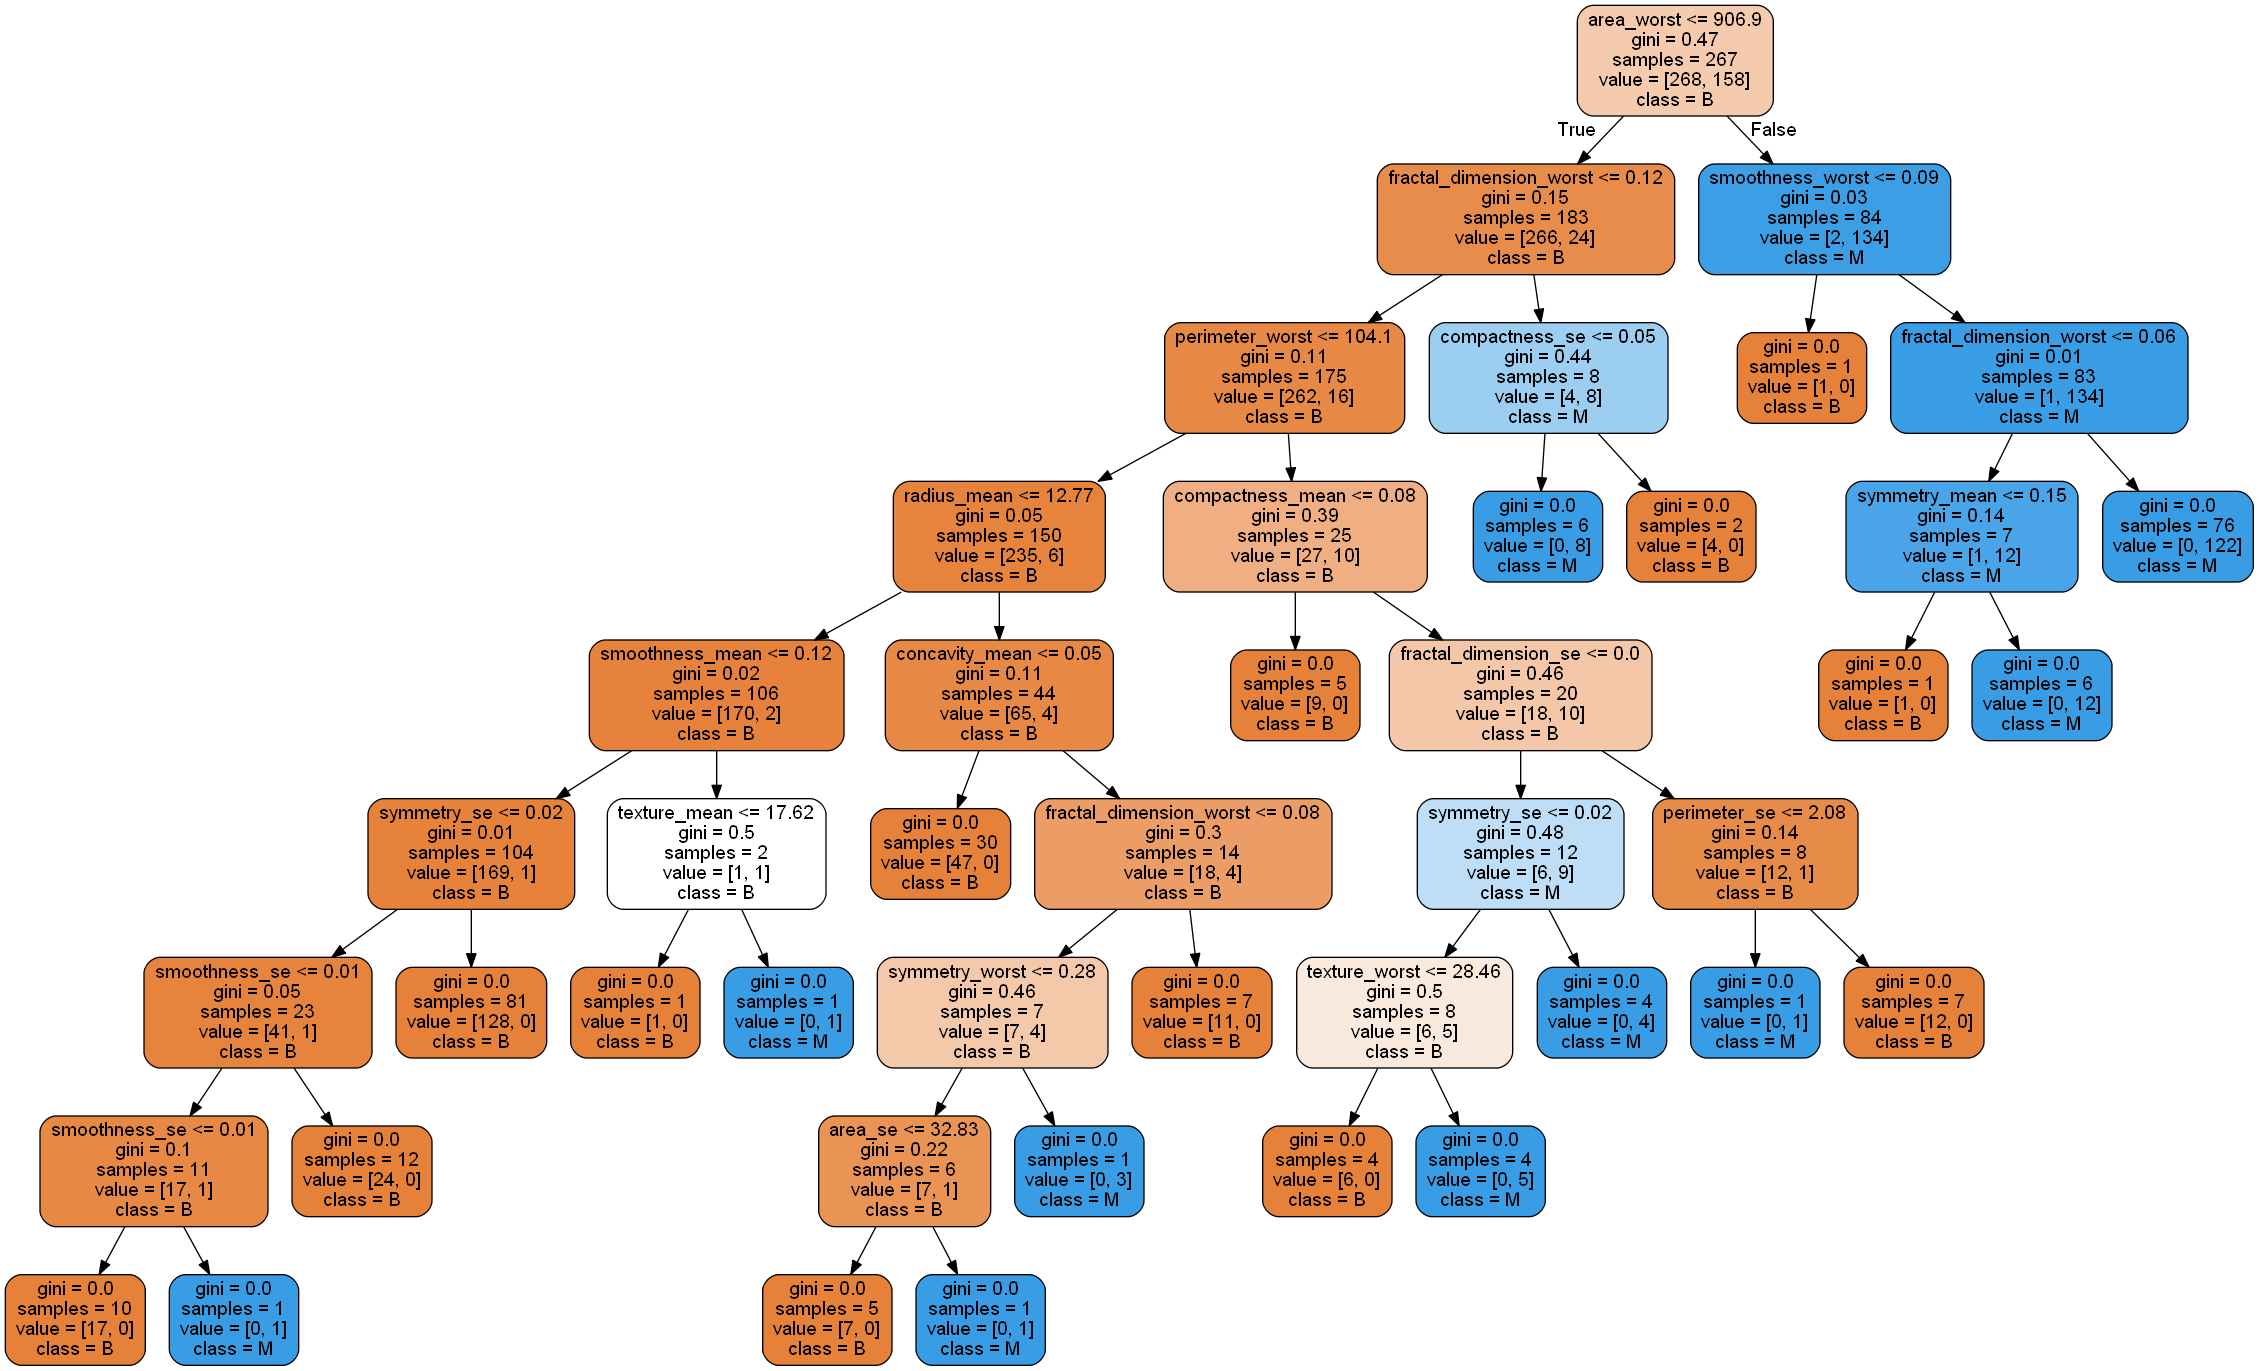

In [51]:
model1 = RandomForestClassifier(n_estimators=100, max_features=2)
model1.fit(x_train,y_train)
# Extract single tree
estimator = model1.estimators_[42]

dot_data = tree.export_graphviz(estimator, out_file=None, 
                feature_names = x.columns,class_names = model1.classes_, rounded = True, proportion = False, 
                precision = 2, filled = True)  
graph = graphviz.Source(dot_data)  
graph = pydotplus.graph_from_dot_data(dot_data)  

# Show graph
Image(graph.create_png())

In [52]:
# Create PDF
graph.write_pdf("random_forest2.pdf")

# Create PNG
graph.write_png("random_forest2.png")

True